In [2]:
from sklearn.datasets import fetch_20newsgroups, fetch_20newsgroups_vectorized
from pprint import pprint
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from src.gaussian_mixture.gaussian_mixture import evaluate_case, find_best_component_number
from src.utils.dataset import visualize
from src.utils.dataset import *
import pandas as pd
from sklearn.mixture import BayesianGaussianMixture, GaussianMixture
from sklearn.cluster import KMeans
from sys import getsizeof
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE, MDS
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from  sklearn import metrics
from lifelines.utils import concordance_index

In [3]:
def visualize_2d(data_2d, y_pred, labels):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1,1,1)
    for i in range(len(labels)):
        idx = np.argwhere(y_pred == i+1)
        ax.scatter(data_2d[idx,0], data_2d[idx,1], label=labels[i], cmap='tab20')
    ax.legend()
    plt.show()

In [15]:
def calculate_clustering_metrics(labels_true, labels_pred):
    metrics_to_evaluate_1 = {
        'c_index': concordance_index,
        'homogeneity': metrics.homogeneity_score,
        'completeness': metrics.completeness_score,
        'v_measure': metrics.v_measure_score,
        'normalized_mutual_info': metrics.normalized_mutual_info_score,
    }

    metrics_to_evaluate_2 = {
        'silhouette': metrics.silhouette_score,
        'davies_bouldin': metrics.davies_bouldin_score,
    }

    p1 = {
        metric_name: metric(labels_true, labels_pred) for
        metric_name, metric in
        metrics_to_evaluate_1.items()
    }
    p2 = {
        metric_name: metric(labels_true.reshape((-1,1)), labels_pred.reshape((-1,1))) for
        metric_name, metric in
        metrics_to_evaluate_2.items()
    }

    p1.update(p2)

    return p1

In [5]:
cats = ['alt.atheism',
 'comp.windows.x',
 'rec.sport.baseball',
 'sci.med',
 'soc.religion.christian',
 'talk.politics.guns',
]

In [6]:
newsgroups = fetch_20newsgroups(subset='all', categories=cats)
texts = newsgroups.data # Extract text
target = newsgroups.target # Extract target

In [7]:
vectorizer = TfidfVectorizer(stop_words="english")
vectors = vectorizer.fit_transform(texts)

In [8]:
dim2 = TSNE(n_components=2).fit_transform(vectors)

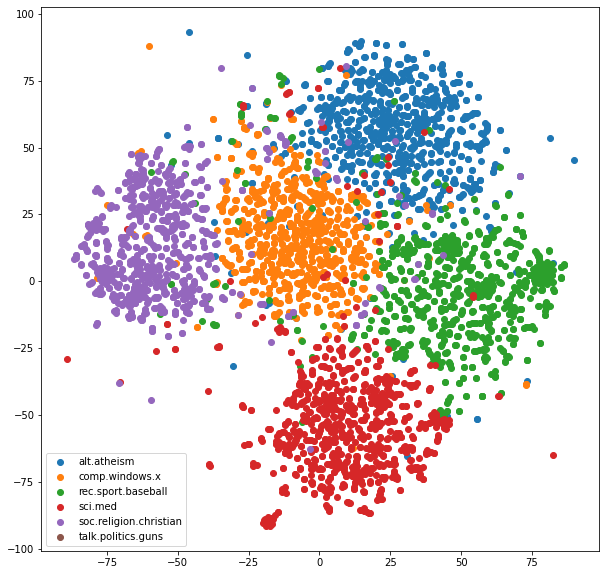

In [39]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
for i in range(len(cats)):
    idx = np.argwhere(target == i+1)
    ax.scatter(dim2[idx,0], dim2[idx,1], label=cats[i], cmap='tab20')
ax.legend()
plt.show()

In [11]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
tf = tf_vectorizer.fit_transform(texts)
tf_feature_names = tf_vectorizer.get_feature_names()

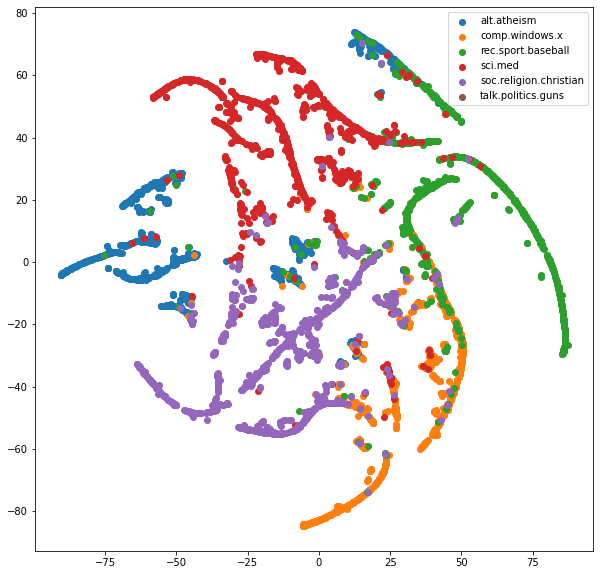

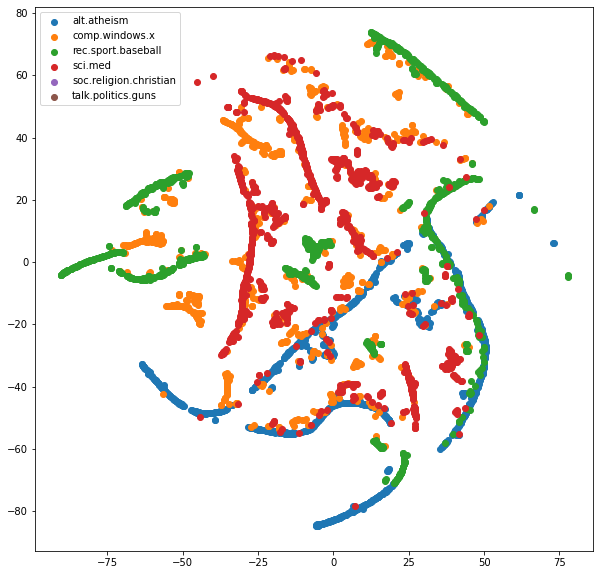

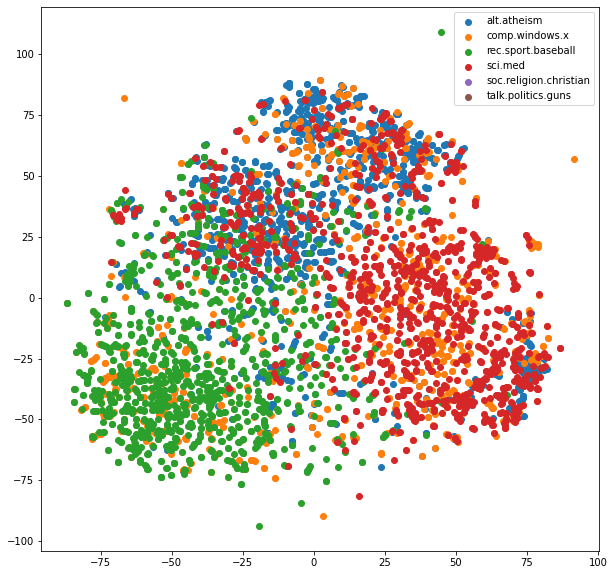

C:\Users\user\IET\UM\agh-um-gaussian-mixture-models\venv\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\user\IET\UM\agh-um-gaussian-mixture-models\venv\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


{'c_index': 0.40722739579295525,
 'homogeneity': 0.30316433759535516,
 'completeness': 0.339819611352043,
 'v_measure': 0.3204471512736975,
 'normalized_mutual_info': 0.32044715127369755,
 'silhouette': -0.09493374985268441,
 'davies_bouldin': 374.6195173488504}

In [17]:
no_topics = 5
lda = LatentDirichletAllocation(n_components=no_topics,
                                max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0,
                                n_jobs=4)
lda.fit(tf)
x_lda = lda.transform(tf)
tsne_lda = TSNE(n_components=2).fit_transform(x_lda)
visualize_2d(tsne_lda, target, cats)
gmm = GaussianMixture(n_components=5)
gmm.fit(x_lda)
predicted = gmm.predict(x_lda)
visualize_2d(tsne_lda, predicted, cats)
visualize_2d(dim2, predicted, cats)
calculate_clustering_metrics(target, predicted)

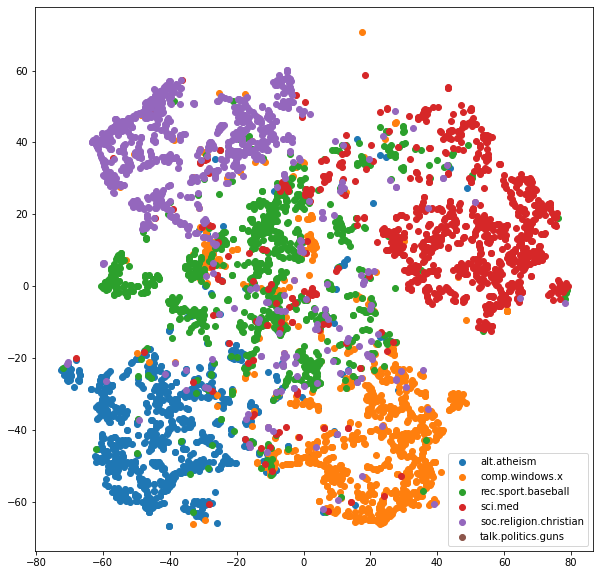

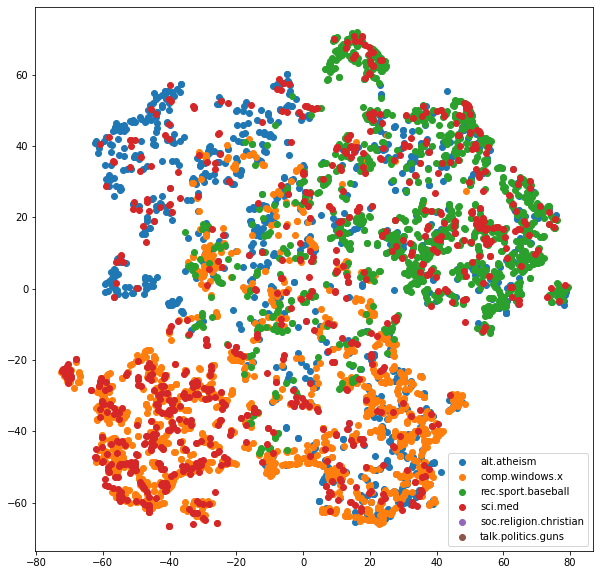

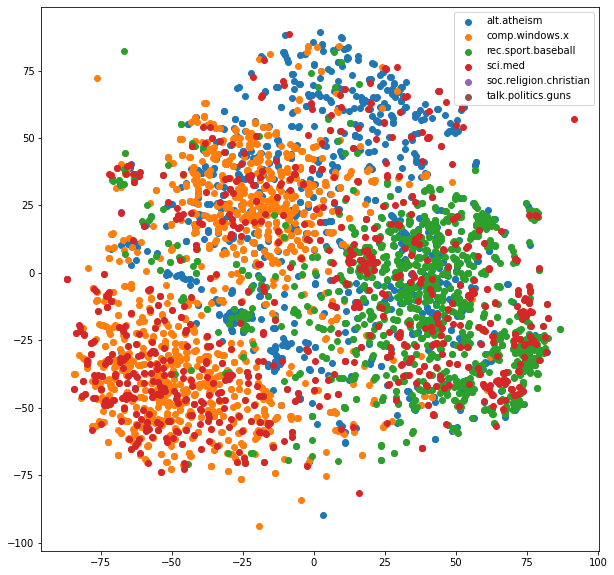

In [12]:
no_topics = 30
lda = LatentDirichletAllocation(n_components=no_topics,
                                max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0,
                                n_jobs=4)
lda.fit(tf)
x_lda = lda.transform(tf)
tsne_lda = TSNE(n_components=2).fit_transform(x_lda)
visualize_2d(tsne_lda, target, cats)
gmm = GaussianMixture(n_components=5)
gmm.fit(x_lda)
predicted = gmm.predict(x_lda)
visualize_2d(tsne_lda, predicted, cats)
visualize_2d(dim2, predicted, cats)

In [16]:
calculate_clustering_metrics(target, predicted)


C:\Users\user\IET\UM\agh-um-gaussian-mixture-models\venv\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\user\IET\UM\agh-um-gaussian-mixture-models\venv\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


{'c_index': 0.35860342880430235,
 'homogeneity': 0.29652316828494885,
 'completeness': 0.33327370234350734,
 'v_measure': 0.3138261834370144,
 'normalized_mutual_info': 0.31382618343701446,
 'silhouette': -0.03999473686038936,
 'davies_bouldin': 6.737471631523128}

0.35860342880430235